In [1]:
# Importing Important Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Load the data sit
#Loading train dataset in rawdf and test dataset in prediction.
rawdf=pd.read_csv(r"C:\Users\keshav\OneDrive\Desktop\ML_Project\Interview_Response_Classification\train_IA_-_train.csv")
predictiondf=pd.read_csv(r"C:\Users\keshav\OneDrive\Desktop\ML_Project\Interview_Response_Classification\test_IA_-_test.csv")

In [3]:
# Chacking dimension of rawdf dataset.

print(f"Rows and Columns in Dataset", rawdf.shape)

Rows and Columns in Dataset (5800, 27)


In [4]:
# Sampling the data into train, test and prediction
from sklearn.model_selection import train_test_split

trainDf, testDf= train_test_split(rawdf, train_size=0.7, random_state=2410)

print(trainDf.shape)
print(testDf.shape)
print(predictiondf.shape)

(4059, 27)
(1741, 27)
(1200, 26)


In [5]:
trainDf.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
2164,2.266570e+11,5.808331e+09,237,HR,0.67,0.33,60,85,90,37,...,2,4,Negative,Neutral,85,23,No,Yes,Yes,May Consider
2582,9.404013e+10,3.184951e+09,194,Product Manager,0.74,0.26,61,100,40,24,...,20,5,Positive,Neutral,4,60,No,Yes,Yes,Not Consider
2708,4.269618e+10,3.950468e+09,216,Developer,0.67,0.33,112,60,77,56,...,16,3,Positive,Negative,45,17,No,No,Yes,Consider
4967,1.765470e+11,6.205472e+07,240,Program Manager,0.60,0.40,103,47,54,63,...,10,4,Negative,Neutral,58,60,Yes,Yes,No,Not Consider
2315,9.296380e+11,7.532732e+09,205,QA Manual,0.78,0.22,75,96,77,24,...,13,2,Neutral,Neutral,61,28,No,Yes,Yes,Not Consider


In [8]:
testDf.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
3456,5.363600e+11,9.273041e+09,233,Program Manager,0.95,0.05,74,65,94,55,...,13,4,Neutral,Neutral,56,45,No,Yes,Yes,May Consider
1142,4.420820e+11,5.127957e+09,212,Marketing,0.51,0.49,102,85,90,48,...,19,6,Negative,Neutral,49,15,No,Yes,No,May Consider
2676,6.802380e+11,5.918061e+09,206,Sales,0.63,0.37,38,76,47,40,...,20,5,Negative,Negative,85,43,No,Yes,No,Consider
2200,6.105202e+10,2.584948e+09,263,Developer,0.56,0.44,42,40,47,66,...,11,4,Negative,Positive,9,49,Yes,No,Yes,May Consider
5403,1.600135e+10,8.076788e+09,246,Data Scientist,0.61,0.39,44,105,90,41,...,1,7,Positive,Negative,10,52,No,No,Yes,Consider


In [9]:
# Creating source column in train, test and prediction.

trainDf["Source"]="Train"
testDf["Source"]="Test"
predictiondf["Source"]="Prediction"

In [10]:
# Combine train, test & prediction.
fullRaw=pd.concat([trainDf, testDf, predictiondf], axis=0)

In [11]:
print("Number of rows and columns:",fullRaw.shape)

Number of rows and columns: (7000, 28)


In [12]:
#View the top 10 rows of the dataset rawsdf
fullRaw.head(10)

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status,Source
2164,2.266570e+11,5.808331e+09,237,HR,0.67,0.33,60,85,90,37,...,4.0,Negative,Neutral,85.0,23,No,Yes,Yes,May Consider,Train
2582,9.404013e+10,3.184951e+09,194,Product Manager,0.74,0.26,61,100,40,24,...,5.0,Positive,Neutral,4.0,60,No,Yes,Yes,Not Consider,Train
2708,4.269618e+10,3.950468e+09,216,Developer,0.67,0.33,112,60,77,56,...,3.0,Positive,Negative,45.0,17,No,No,Yes,Consider,Train
4967,1.765470e+11,6.205472e+07,240,Program Manager,0.60,0.40,103,47,54,63,...,4.0,Negative,Neutral,58.0,60,Yes,Yes,No,Not Consider,Train
2315,9.296380e+11,7.532732e+09,205,QA Manual,0.78,0.22,75,96,77,24,...,2.0,Neutral,Neutral,61.0,28,No,Yes,Yes,Not Consider,Train
5290,9.488330e+11,9.585797e+09,205,Product Manager,0.86,0.14,115,112,54,41,...,6.0,Positive,Negative,2.0,37,No,Yes,Yes,Consider,Train
1886,2.440600e+11,7.233286e+09,218,Product Manager,0.87,0.13,90,102,101,67,...,2.0,Negative,Negative,67.0,18,No,No,No,Consider,Train
2759,8.390350e+11,4.731715e+09,268,QA Automation,0.59,0.41,75,80,52,58,...,3.0,Positive,Neutral,68.0,38,No,No,Yes,Consider,Train
5075,8.285650e+11,6.497383e+09,248,Data Scientist,0.93,0.07,107,67,96,36,...,6.0,Neutral,Neutral,93.0,23,No,Yes,No,Not Consider,Train
378,6.958360e+11,4.920828e+09,192,Developer,0.92,0.08,60,64,43,56,...,3.0,Negative,Negative,29.0,39,Yes,Yes,No,Not Consider,Train


In [13]:
# See the value count for Source column
fullRaw["Source"].value_counts()

Source
Train         4059
Test          1741
Prediction    1200
Name: count, dtype: int64

In [14]:
# See the value count for Status column
fullRaw["Status"].value_counts()

Status
Consider        2311
May Consider    1890
Not Consider    1595
Name: count, dtype: int64

In [15]:
#View the last 10 rows of the dataset.
fullRaw.tail(10)

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status,Source
1190,8.925667e+11,2.879479e+09,243,QA Automation,0.69,0.31,97,76,119,27,...,5.0,Neutral,Negative,19.0,15,Yes,No,No,NaN,Prediction
1191,7.037465e+11,6.182235e+09,237,Product Manager,0.89,0.11,47,53,65,69,...,3.0,Neutral,Positive,75.0,57,Yes,No,Yes,NaN,Prediction
1192,9.758866e+10,7.974433e+09,190,QA Automation,0.99,0.01,120,103,74,25,...,5.0,Negative,Negative,15.0,44,Yes,No,Yes,NaN,Prediction
1193,6.871604e+11,2.902989e+09,243,Developer,0.97,0.03,31,62,52,53,...,5.0,Negative,Negative,44.0,46,No,Yes,No,NaN,Prediction
1194,5.298429e+11,4.769848e+08,196,QA Manual,0.95,0.05,35,60,72,62,...,5.0,Negative,Negative,30.0,21,Yes,Yes,Yes,NaN,Prediction
1195,2.560337e+11,1.299110e+09,193,Marketing,0.66,0.34,95,118,79,65,...,7.0,Positive,Negative,86.0,49,Yes,Yes,No,NaN,Prediction
1196,6.273373e+11,2.367087e+09,233,Data Scientist,0.66,0.34,42,47,107,57,...,2.0,Positive,Negative,32.0,32,No,Yes,No,NaN,Prediction
1197,7.554703e+10,4.401842e+09,214,HR,0.73,0.27,72,105,78,55,...,3.0,Negative,Negative,34.0,19,Yes,Yes,No,NaN,Prediction
1198,1.739148e+11,7.505289e+08,231,Developer,0.95,0.05,42,45,68,60,...,7.0,Positive,Negative,78.0,23,No,No,No,NaN,Prediction
1199,4.805196e+11,3.065201e+09,214,Sales,0.97,0.03,116,48,118,28,...,6.0,Positive,Positive,86.0,60,No,No,Yes,NaN,Prediction


In [16]:
# Describe the dataset and view the dtype of the data
fullRaw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 2164 to 1199
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        7000 non-null   float64
 1   Candidate Id        7000 non-null   float64
 2   Interviewer Id      7000 non-null   int64  
 3   Profile             7000 non-null   object 
 4   S.L.R.C             7000 non-null   float64
 5   S.L.R.I             6999 non-null   float64
 6   A.T.T               7000 non-null   int64  
 7   L.M.I               7000 non-null   int64  
 8   L.M.C               7000 non-null   int64  
 9   S.R                 7000 non-null   int64  
 10  L.J.T.C             6999 non-null   float64
 11  L.J.T.I             7000 non-null   int64  
 12  N.I.C               7000 non-null   int64  
 13  N.I.I               7000 non-null   int64  
 14  S.P.I               6998 non-null   float64
 15  S.P.C               7000 non-null   int64  
 16  L.A.C   

In [17]:
#Remove the unwanted spaces and convert into lower case from the column name.
fullRaw.columns= fullRaw.columns.str.strip().str.lower().str.replace(" ","_")

In [18]:
#VIew the dimension of the dataset.
print(f"Rows and Columns in the dataset:", fullRaw.shape) 

Rows and Columns in the dataset: (7000, 28)


In [19]:
#Column names of the dataset
print(f"Column names:",fullRaw.columns)

Column names: Index(['interview_id', 'candidate_id', 'interviewer_id', 'profile', 's.l.r.c',
       's.l.r.i', 'a.t.t', 'l.m.i', 'l.m.c', 's.r', 'l.j.t.c', 'l.j.t.i',
       'n.i.c', 'n.i.i', 's.p.i', 's.p.c', 'l.a.c', 'l.a.i', 'q.a', 'p.e.i',
       'p.e.c', 'compliance_ratio', 'interview_duration', 'interviewer_intro',
       'candidate_into', 'opp_to_ask', 'status', 'source'],
      dtype='object')


In [20]:
# Summarize the dataset
fullRaw.describe()

,interview_id,candidate_id,interviewer_id,s.l.r.c,s.l.r.i,a.t.t,l.m.i,l.m.c,s.r,l.j.t.c,l.j.t.i,n.i.c,n.i.i,s.p.i,s.p.c,l.a.c,l.a.i,q.a,compliance_ratio,interview_duration
count,7.000000e+03,7.000000e+03,7000.000000,7000.000000,6999.000000,7000.000000,7000.000000,7000.000000,7000.000000,6999.000000,7000.000000,7000.000000,7000.000000,6998.000000,7000.000000,7000.000000,6999.000000,6999.000000,6999.000000,7000.000000
mean,4.947849e+11,4.991220e+09,229.472857,0.746509,0.253511,69.973857,80.273286,80.306286,45.066429,150.518646,301.705286,37.669143,37.435000,55.082023,47.391000,7.982286,10.540792,4.483783,50.304329,37.380286
std,2.893782e+11,2.868670e+09,22.780335,0.144336,0.144337,29.402431,23.390900,23.467090,14.705530,87.171820,173.262668,19.024329,19.146328,20.423783,24.801676,4.326670,5.725952,1.690715,28.809214,13.309818
min,3.693968e+08,1.467066e+05,190.000000,0.500000,0.010000,20.000000,40.000000,40.000000,20.000000,0.000000,0.000000,5.000000,5.000000,20.000000,5.000000,1.000000,1.000000,2.000000,0.000000,15.000000
25%,2.420050e+11,2.498401e+09,210.000000,0.620000,0.130000,44.000000,60.000000,60.000000,32.000000,75.000000,153.000000,21.000000,20.000000,38.000000,26.000000,4.000000,6.000000,3.000000,25.000000,26.000000
50%,4.913495e+11,5.014034e+09,229.000000,0.750000,0.250000,70.000000,80.000000,81.000000,45.000000,150.000000,301.000000,38.000000,38.000000,55.000000,47.000000,8.000000,11.000000,4.000000,51.000000,37.000000
75%,7.463995e+11,7.441582e+09,249.000000,0.870000,0.380000,96.000000,101.000000,101.000000,58.000000,227.000000,452.000000,54.000000,54.000000,73.000000,69.000000,12.000000,15.000000,6.000000,75.000000,49.000000
max,9.999090e+11,9.999362e+09,268.000000,0.990000,0.500000,120.000000,120.000000,120.000000,70.000000,300.000000,600.000000,70.000000,70.000000,90.000000,90.000000,15.000000,20.000000,7.000000,100.000000,60.000000


In [21]:
# Drop the unnecessary columns, Interview Id, Candidate Id, Interviewer Id columns. 
fullRaw.drop(['interview_id', 'candidate_id', 'interviewer_id'], axis=1, inplace=True)

In [22]:
# Checking duplicates if we have in data.
duplicate=fullRaw[fullRaw.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [profile, s.l.r.c, s.l.r.i, a.t.t, l.m.i, l.m.c, s.r, l.j.t.c, l.j.t.i, n.i.c, n.i.i, s.p.i, s.p.c, l.a.c, l.a.i, q.a, p.e.i, p.e.c, compliance_ratio, interview_duration, interviewer_intro, candidate_into, opp_to_ask, status, source]
Index: []

[0 rows x 25 columns]


In [23]:
# Checking Data Types of columns.
print(fullRaw.dtypes)

profile                object
s.l.r.c               float64
s.l.r.i               float64
a.t.t                   int64
l.m.i                   int64
l.m.c                   int64
s.r                     int64
l.j.t.c               float64
l.j.t.i                 int64
n.i.c                   int64
n.i.i                   int64
s.p.i                 float64
s.p.c                   int64
l.a.c                   int64
l.a.i                 float64
q.a                   float64
p.e.i                  object
p.e.c                  object
compliance_ratio      float64
interview_duration      int64
interviewer_intro      object
candidate_into         object
opp_to_ask             object
status                 object
source                 object
dtype: object


In [24]:
# Lets check the null values in the datset.
null_counts=fullRaw.isnull().sum()
column_with_nulls=null_counts[null_counts > 0]
print(column_with_nulls)
print(column_with_nulls.dtypes)

s.l.r.i                 1
l.j.t.c                 1
s.p.i                   2
l.a.i                   1
q.a                     1
p.e.i                   3
p.e.c                   5
compliance_ratio        1
interviewer_intro       3
opp_to_ask              1
status               1204
dtype: int64
int64


In [25]:
# Filling Catogorical Nan values
cat_col= fullRaw.select_dtypes(include=["object"]).columns
fullRaw[cat_col]= fullRaw[cat_col].fillna(fullRaw[cat_col].mode().iloc[0])

In [26]:
# Fill Continous Nan Values
con_col= fullRaw.select_dtypes(include=["int64"]).columns
fullRaw[con_col]= fullRaw[con_col].fillna(fullRaw[con_col].median())

In [27]:
# Fill nan values for float datatype 
con_cols= fullRaw.select_dtypes(include=["float64"]).columns
fullRaw[con_cols]= fullRaw[con_cols].fillna(fullRaw[con_cols].median())

In [28]:
# checking the null values in the dataset.
fullRaw.isnull().sum().sum()

0

In [29]:
fullRaw.shape

(7000, 25)

In [30]:
# Now checking the data type and label encoding of the rawdf dataset.
print(fullRaw.info())
print(fullRaw.head())

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 2164 to 1199
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   profile             7000 non-null   object 
 1   s.l.r.c             7000 non-null   float64
 2   s.l.r.i             7000 non-null   float64
 3   a.t.t               7000 non-null   int64  
 4   l.m.i               7000 non-null   int64  
 5   l.m.c               7000 non-null   int64  
 6   s.r                 7000 non-null   int64  
 7   l.j.t.c             7000 non-null   float64
 8   l.j.t.i             7000 non-null   int64  
 9   n.i.c               7000 non-null   int64  
 10  n.i.i               7000 non-null   int64  
 11  s.p.i               7000 non-null   float64
 12  s.p.c               7000 non-null   int64  
 13  l.a.c               7000 non-null   int64  
 14  l.a.i               7000 non-null   float64
 15  q.a                 7000 non-null   float64
 16  p.e.i   

In [31]:
fullRaw.head()

,profile,s.l.r.c,s.l.r.i,a.t.t,l.m.i,l.m.c,s.r,l.j.t.c,l.j.t.i,n.i.c,...,q.a,p.e.i,p.e.c,compliance_ratio,interview_duration,interviewer_intro,candidate_into,opp_to_ask,status,source
2164,HR,0.67,0.33,60,85,90,37,130.0,471,11,...,4.0,Negative,Neutral,85.0,23,No,Yes,Yes,May Consider,Train
2582,Product Manager,0.74,0.26,61,100,40,24,251.0,235,70,...,5.0,Positive,Neutral,4.0,60,No,Yes,Yes,Not Consider,Train
2708,Developer,0.67,0.33,112,60,77,56,66.0,400,28,...,3.0,Positive,Negative,45.0,17,No,No,Yes,Consider,Train
4967,Program Manager,0.60,0.40,103,47,54,63,250.0,486,62,...,4.0,Negative,Neutral,58.0,60,Yes,Yes,No,Not Consider,Train
2315,QA Manual,0.78,0.22,75,96,77,24,209.0,257,30,...,2.0,Neutral,Neutral,61.0,28,No,Yes,Yes,Not Consider,Train


## Exploratory Data Analysis (EDA)

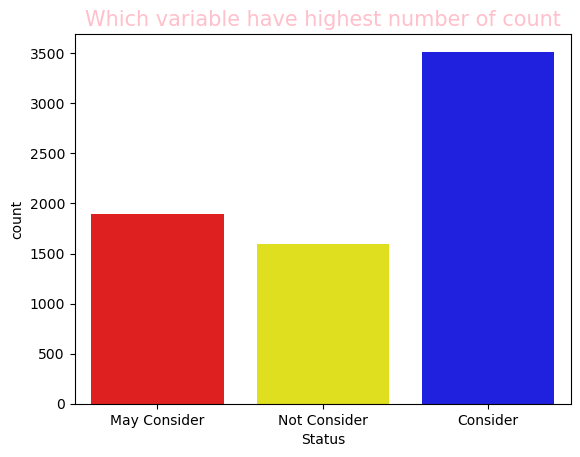

In [29]:
#Checking the status which have more number of counts.
sns.countplot(x=fullRaw["status"], fill=True, palette=['red','yellow','blue'])
plt.title("Which variable have highest number of count", fontsize=(15), color="pink")
plt.xlabel("Status")
plt.show()

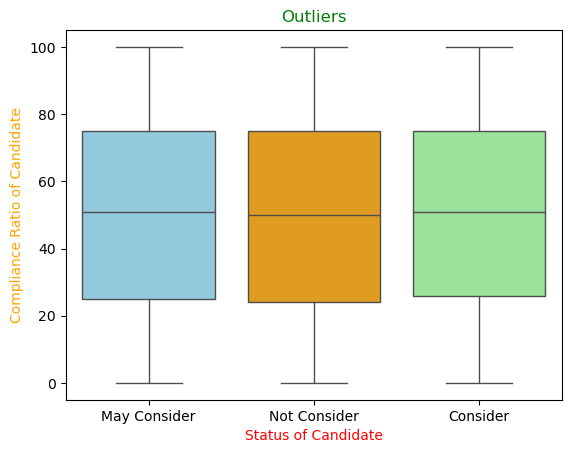

In [30]:
# Checking Outliers in the Dataset. (Depanded vs Continous Varibale)
sns.boxplot(x=fullRaw['status'], y=fullRaw['compliance_ratio'], data=fullRaw, fill=True, palette=['skyblue','orange','lightgreen'])
plt.title("Outliers", fontsize=(12), color="green")
plt.xlabel("Status of Candidate", color="red")
plt.ylabel("Compliance Ratio of Candidate", color="orange")
plt.show()

Unique Customers: 10


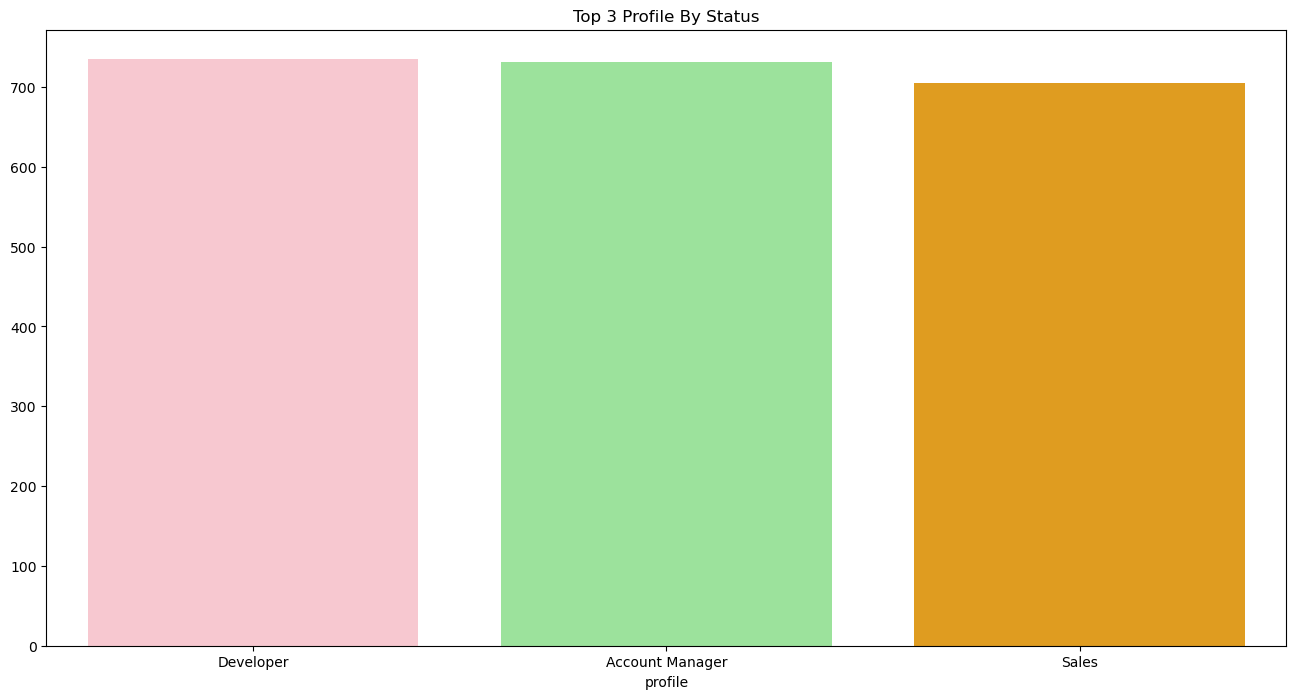

In [31]:
print(f"Unique Customers: {fullRaw['profile'].nunique()}")

top_customers=fullRaw["profile"].value_counts().head(3)
plt.figure(figsize=(16,8))
sns.barplot(x=top_customers.index, y=top_customers.values, fill=True, palette=["pink","lightgreen","orange"])
plt.title("Top 3 Profile By Status")
plt.show()

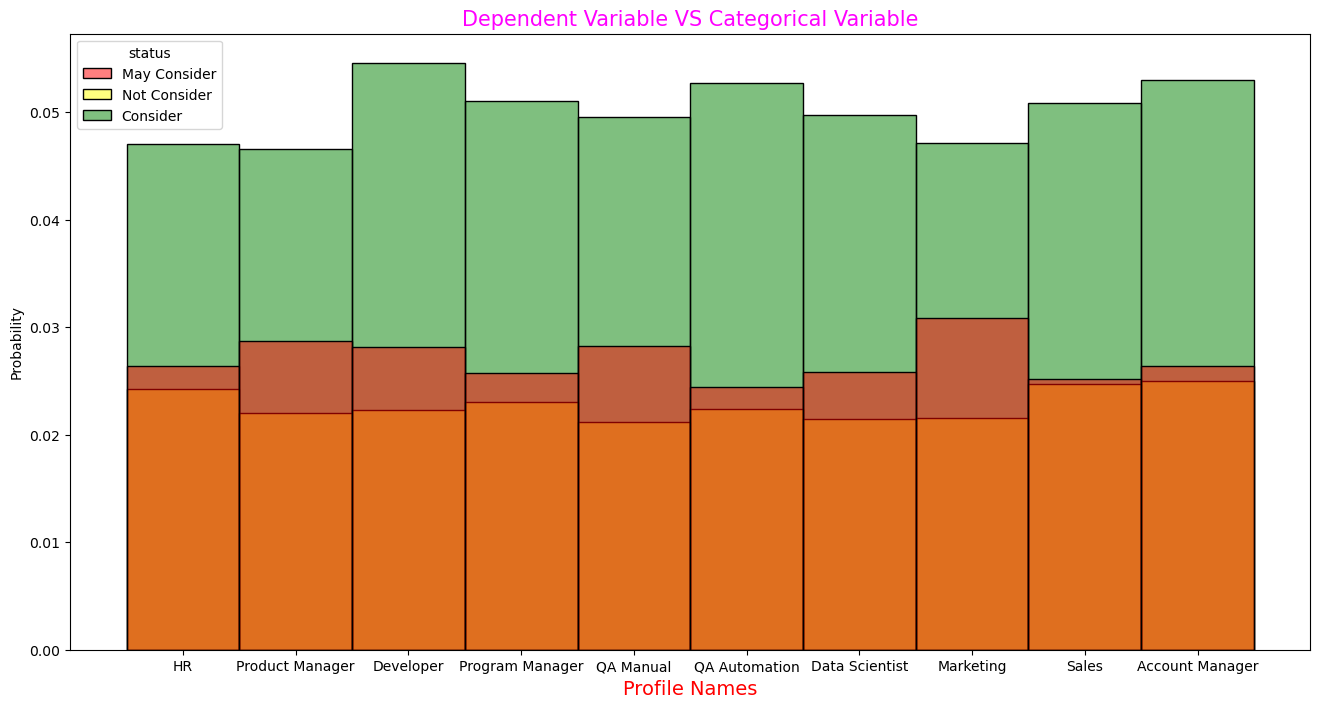

In [32]:
# Checking Outliers in the Dataset.
plt.figure(figsize=(16,8))
sns.histplot(x=fullRaw['profile'], hue=fullRaw['status'], stat='probability', fill=True, palette=['red','yellow','green'])
plt.title("Dependent Variable VS Categorical Variable", fontsize=(15), color="magenta")
plt.xlabel("Profile Names", color="red", fontsize=(14))
plt.show()

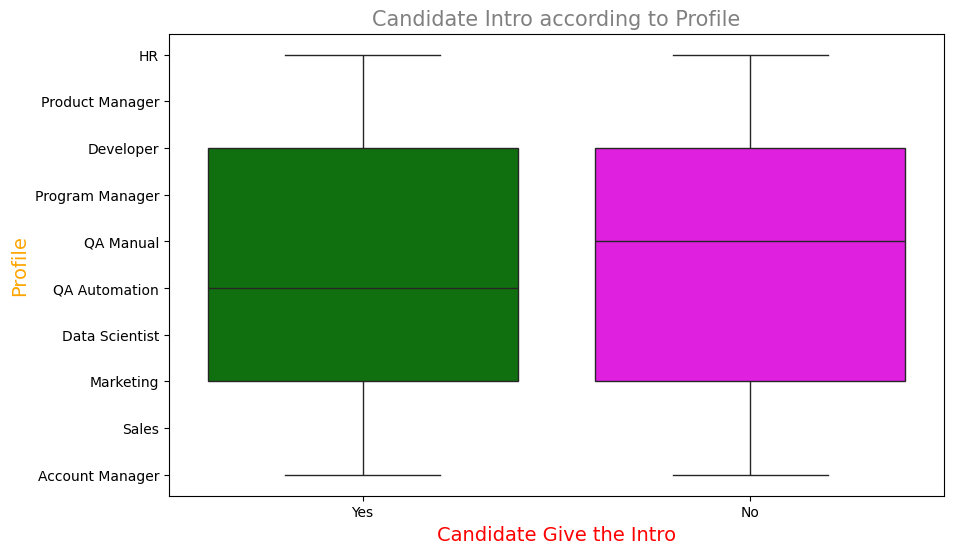

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x=fullRaw['candidate_into'], y=fullRaw['profile'], palette=['green','magenta'])
plt.title("Candidate Intro according to Profile", fontsize=(15), color="gray")
plt.xlabel("Candidate Give the Intro", color="red", fontsize=(14))
plt.ylabel("Profile", color="orange", fontsize=(14))
plt.show()

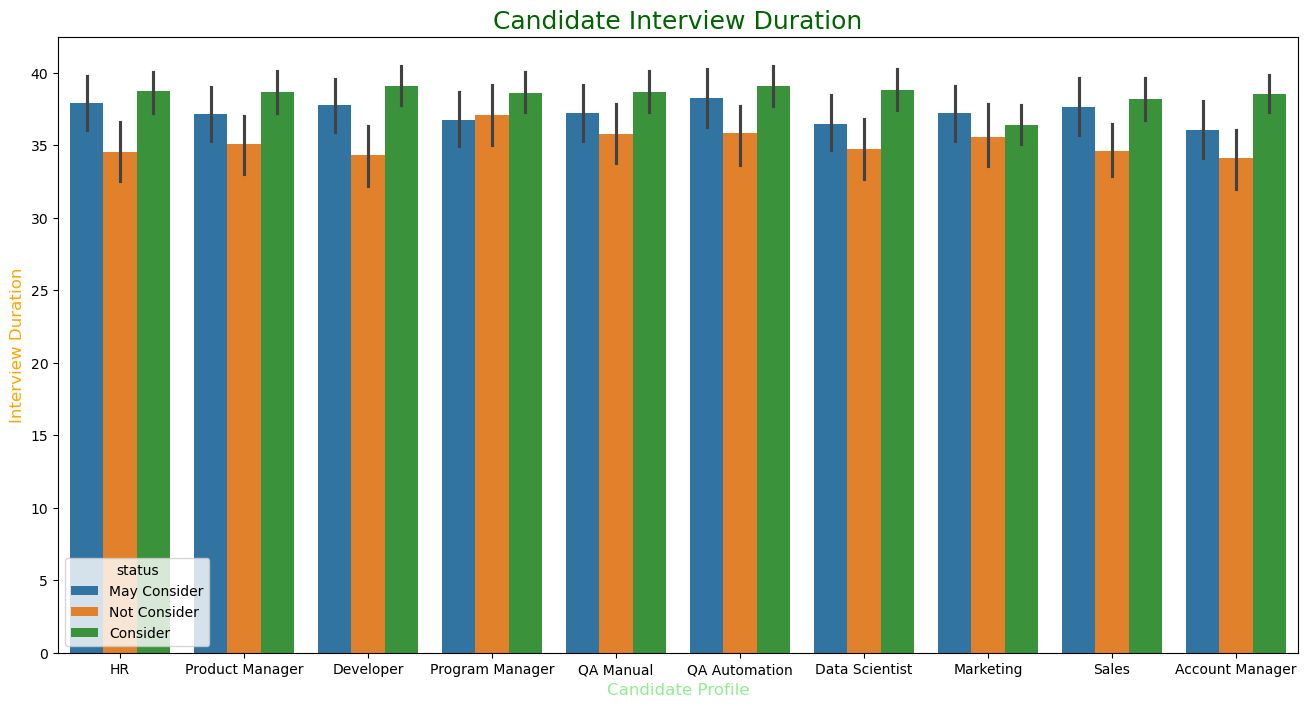

In [34]:
plt.figure(figsize=(16,8))
sns.barplot(y=fullRaw["interview_duration"], x=fullRaw["profile"], hue=fullRaw["status"])
plt.title("Candidate Interview Duration", fontsize=(18), color="darkgreen")
plt.xlabel("Candidate Profile", color="lightgreen", fontsize=(12))
plt.ylabel("Interview Duration", color="orange", fontsize=(12))
plt.show()

In [32]:
# Using One-Hot-Encoding for Profile Column. (If unique categories is small is can use this).

fullRaw=pd.get_dummies(fullRaw, columns=["profile"])

In [33]:
# Using Label Encoding for P.E.I, P.E.C, and status Columns (Since they have ordered categories).
from sklearn.preprocessing import LabelEncoder

label_encoder={}
cols= ["p.e.i","p.e.c","status","source"]

for col in cols:
    label_encoder[col]= LabelEncoder()
    fullRaw[col]=label_encoder[col].fit_transform(fullRaw[col])

In [34]:
# Using Binary Encoding for Interview Intro, Candida Into, Opp to ask).
fullRaw["interviewer_intro"]=fullRaw["interviewer_intro"].map({"Yes":1,"No":0})
fullRaw["candidate_into"]=fullRaw["candidate_into"].map({"Yes":1,"No":0})
fullRaw["opp_to_ask"]=fullRaw["opp_to_ask"].map({"Yes":1,"No":0})

In [35]:
pd.set_option('display.max_columns',None)
fullRaw.head(10)

,s.l.r.c,s.l.r.i,a.t.t,l.m.i,l.m.c,s.r,l.j.t.c,l.j.t.i,n.i.c,n.i.i,s.p.i,s.p.c,l.a.c,l.a.i,q.a,p.e.i,p.e.c,compliance_ratio,interview_duration,interviewer_intro,candidate_into,opp_to_ask,status,source,profile_Account Manager,profile_Data Scientist,profile_Developer,profile_HR,profile_Marketing,profile_Product Manager,profile_Program Manager,profile_QA Automation,profile_QA Manual,profile_Sales
2164,0.67,0.33,60,85,90,37,130.0,471,11,25,64.0,15,15,2.0,4.0,0,1,85.0,23,0,1,1,1,2,False,False,False,True,False,False,False,False,False,False
2582,0.74,0.26,61,100,40,24,251.0,235,70,14,37.0,23,9,20.0,5.0,2,1,4.0,60,0,1,1,2,2,False,False,False,False,False,True,False,False,False,False
2708,0.67,0.33,112,60,77,56,66.0,400,28,39,65.0,39,15,16.0,3.0,2,0,45.0,17,0,0,1,0,2,False,False,True,False,False,False,False,False,False,False
4967,0.60,0.40,103,47,54,63,250.0,486,62,57,63.0,24,15,10.0,4.0,0,1,58.0,60,1,1,0,2,2,False,False,False,False,False,False,True,False,False,False
2315,0.78,0.22,75,96,77,24,209.0,257,30,52,86.0,42,11,13.0,2.0,1,1,61.0,28,0,1,1,2,2,False,False,False,False,False,False,False,False,True,False
5290,0.86,0.14,115,112,54,41,120.0,302,6,17,75.0,74,8,15.0,6.0,2,0,2.0,37,0,1,1,0,2,False,False,False,False,False,True,False,False,False,False
1886,0.87,0.13,90,102,101,67,7.0,116,31,68,89.0,7,5,2.0,2.0,0,0,67.0,18,0,0,0,0,2,False,False,False,False,False,True,False,False,False,False
2759,0.59,0.41,75,80,52,58,31.0,99,13,61,48.0,24,6,4.0,3.0,2,1,68.0,38,0,0,1,0,2,False,False,False,False,False,False,False,True,False,False
5075,0.93,0.07,107,67,96,36,273.0,488,23,14,39.0,19,3,6.0,6.0,1,1,93.0,23,0,1,0,2,2,False,True,False,False,False,False,False,False,False,False
378,0.92,0.08,60,64,43,56,220.0,18,18,38,65.0,56,4,19.0,3.0,0,0,29.0,39,1,1,0,2,2,False,False,True,False,False,False,False,False,False,False


In [36]:
fullRaw=fullRaw.astype(int)

In [37]:
pd.set_option('display.max_columns',None)
fullRaw.head(10)

,s.l.r.c,s.l.r.i,a.t.t,l.m.i,l.m.c,s.r,l.j.t.c,l.j.t.i,n.i.c,n.i.i,s.p.i,s.p.c,l.a.c,l.a.i,q.a,p.e.i,p.e.c,compliance_ratio,interview_duration,interviewer_intro,candidate_into,opp_to_ask,status,source,profile_Account Manager,profile_Data Scientist,profile_Developer,profile_HR,profile_Marketing,profile_Product Manager,profile_Program Manager,profile_QA Automation,profile_QA Manual,profile_Sales
2164,0,0,60,85,90,37,130,471,11,25,64,15,15,2,4,0,1,85,23,0,1,1,1,2,0,0,0,1,0,0,0,0,0,0
2582,0,0,61,100,40,24,251,235,70,14,37,23,9,20,5,2,1,4,60,0,1,1,2,2,0,0,0,0,0,1,0,0,0,0
2708,0,0,112,60,77,56,66,400,28,39,65,39,15,16,3,2,0,45,17,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0
4967,0,0,103,47,54,63,250,486,62,57,63,24,15,10,4,0,1,58,60,1,1,0,2,2,0,0,0,0,0,0,1,0,0,0
2315,0,0,75,96,77,24,209,257,30,52,86,42,11,13,2,1,1,61,28,0,1,1,2,2,0,0,0,0,0,0,0,0,1,0
5290,0,0,115,112,54,41,120,302,6,17,75,74,8,15,6,2,0,2,37,0,1,1,0,2,0,0,0,0,0,1,0,0,0,0
1886,0,0,90,102,101,67,7,116,31,68,89,7,5,2,2,0,0,67,18,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0
2759,0,0,75,80,52,58,31,99,13,61,48,24,6,4,3,2,1,68,38,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0
5075,0,0,107,67,96,36,273,488,23,14,39,19,3,6,6,1,1,93,23,0,1,0,2,2,0,1,0,0,0,0,0,0,0,0
378,0,0,60,64,43,56,220,18,18,38,65,56,4,19,3,0,0,29,39,1,1,0,2,2,0,0,1,0,0,0,0,0,0,0


In [38]:
fullRaw["source"].value_counts()

source
2    4059
1    1741
0    1200
Name: count, dtype: int64

In [39]:
fullRaw["status"].value_counts()

status
0    3515
1    1890
2    1595
Name: count, dtype: int64

## Feature Selection 

<Axes: >

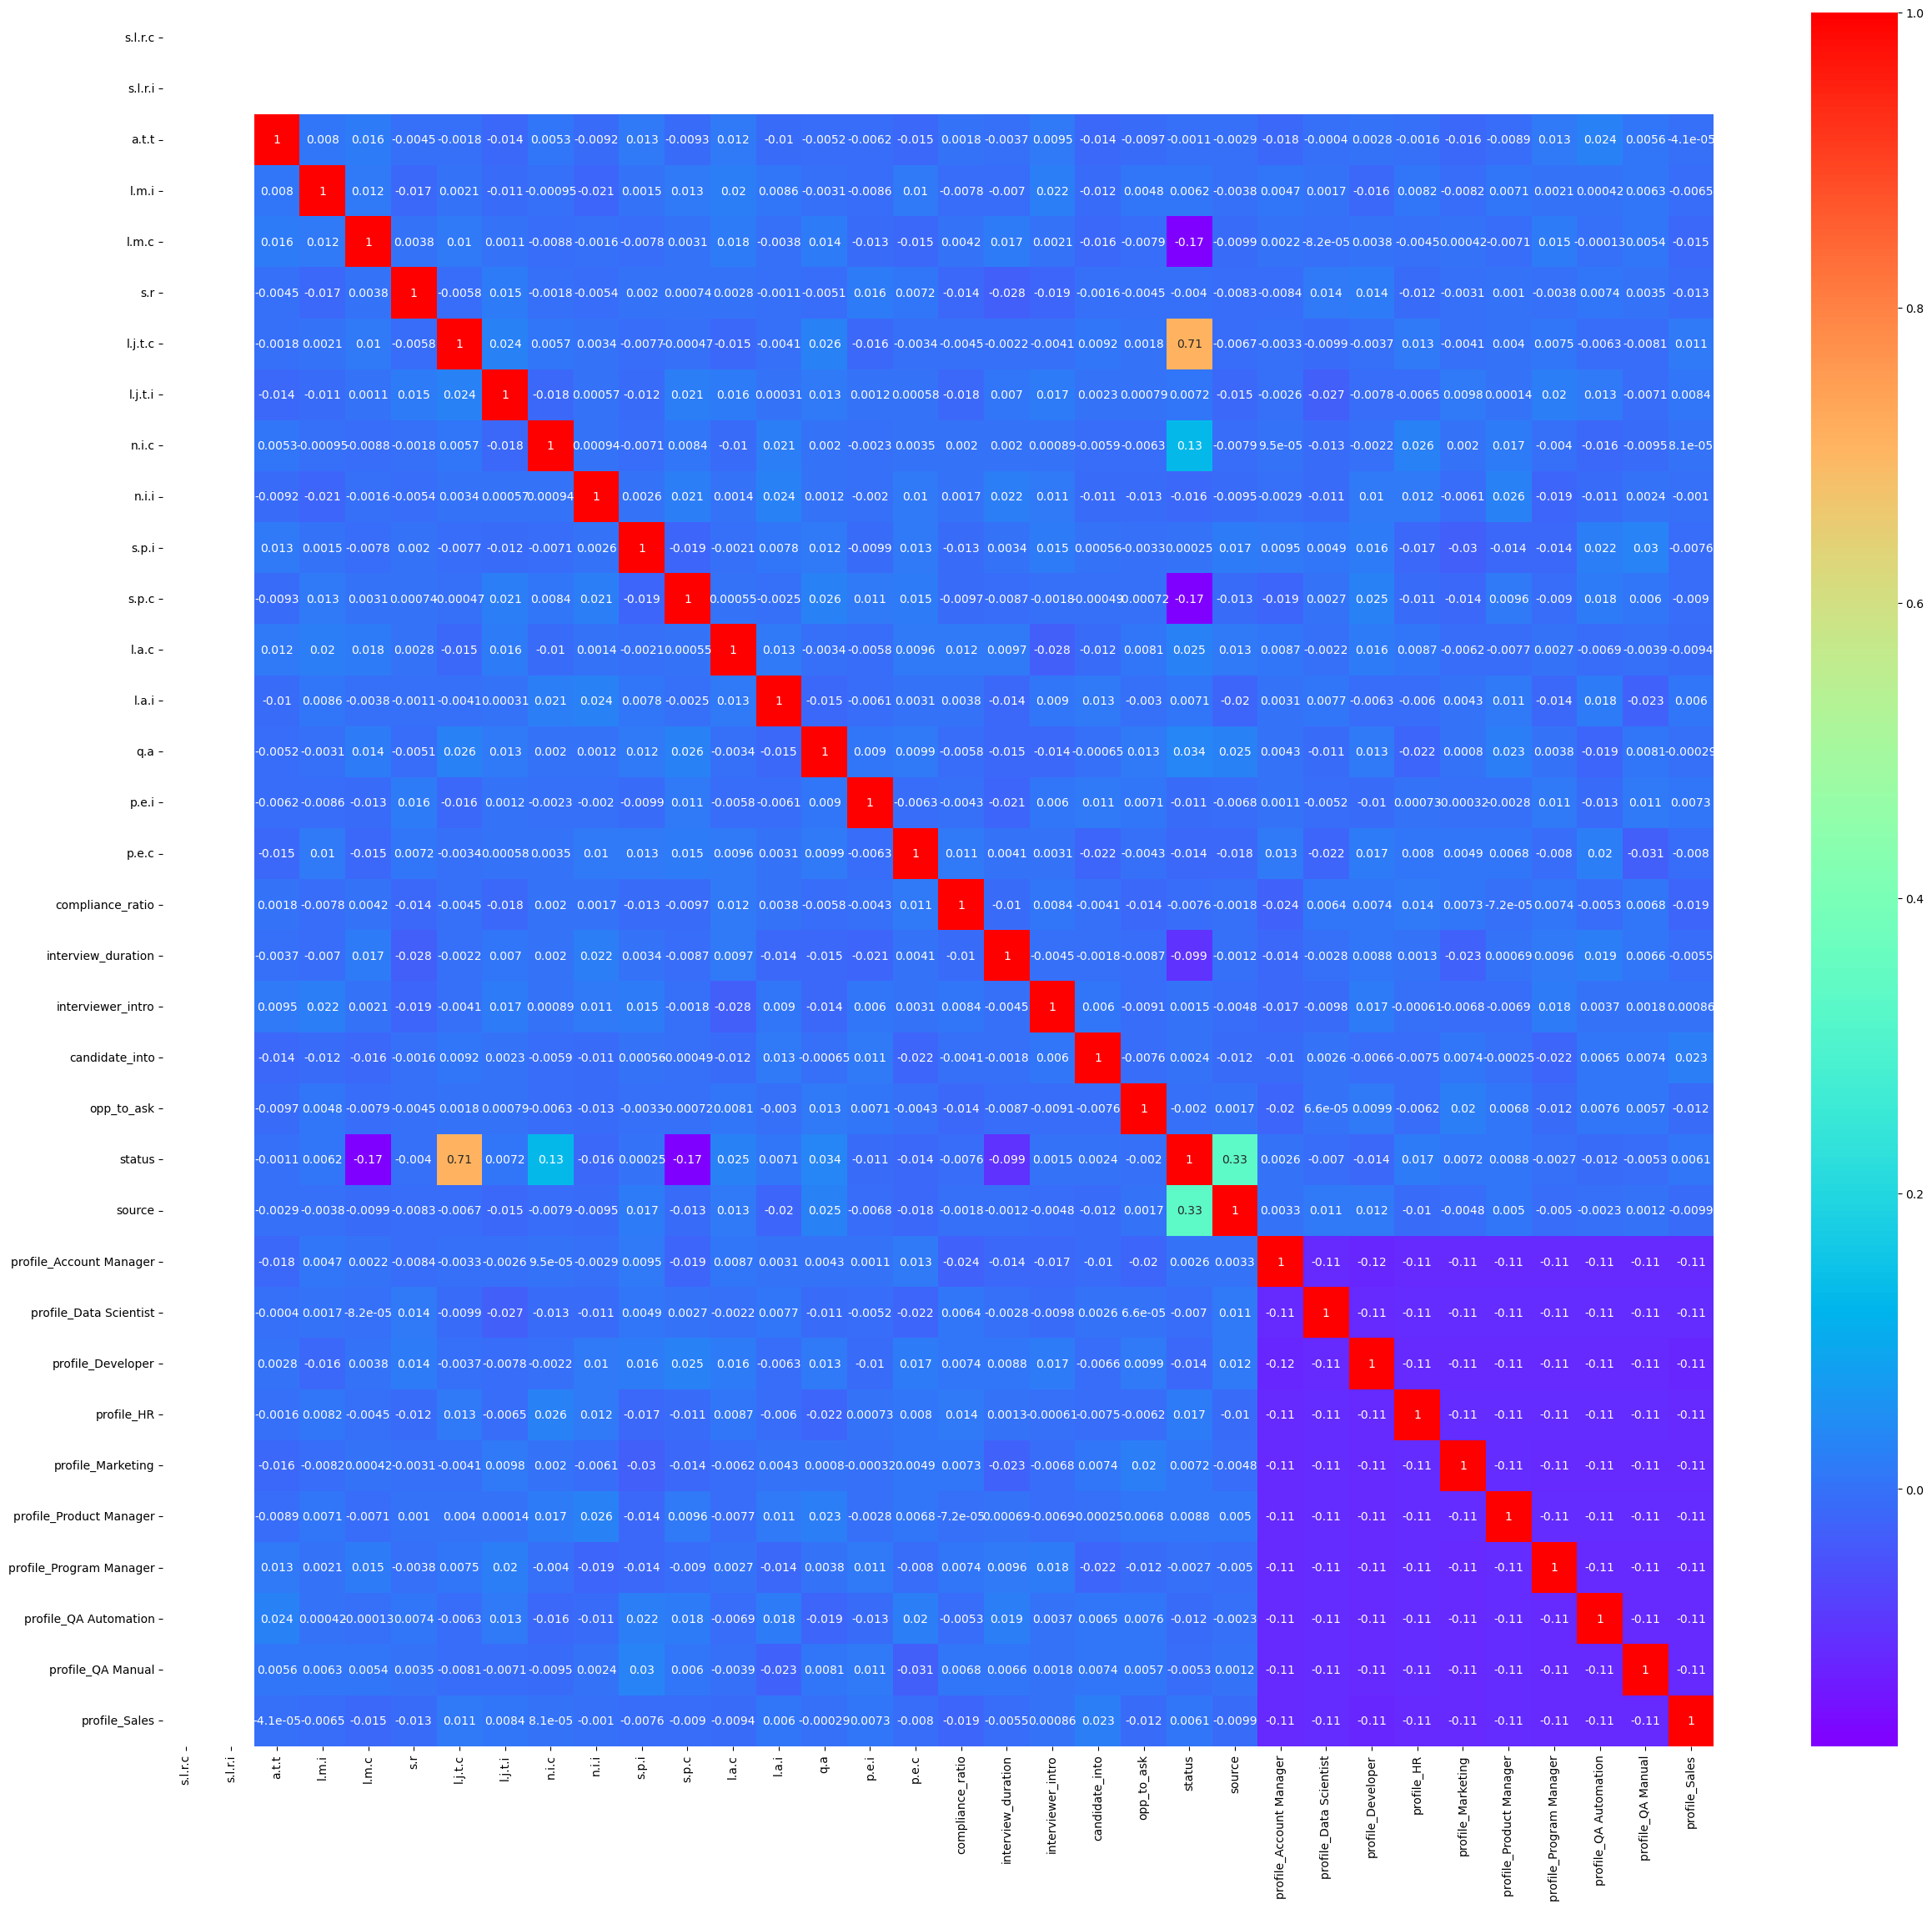

In [42]:
# Checking correlation between every columns.
corrDF=fullRaw.corr()
corrDF

plt.figure(figsize=(30,27))
sns.heatmap(corrDF, annot=True, cmap='rainbow')

In [71]:
from sklearn.feature_selection import VarianceThreshold

VarThresh= VarianceThreshold()
VarThresh.fit(fullRaw)
VarThresh.get_support()

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [98]:
percentile=50
chi2_selector= SelectPercentile(chi2,percentile=percentile)
kBeast= chi2_selector.fit_transform(trainX, trainy)

In [ ]:
chir2_score=pd.DataFrame(list(zip(trainX, trainy)), columns=["Features", "Score"])

In [ ]:
chir2_score

In [57]:
print("Number of original features:", trainX.shape[1])
print("Number of reduce features:", kBeast.shape[1])

Number of original features: 32
Number of reduce features: 16


In [58]:
chi2_selector.get_support()

array([False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
        True, False,  True, False, False])

In [60]:
fullRaw.head()

,s.l.r.c,s.l.r.i,a.t.t,l.m.i,l.m.c,s.r,l.j.t.c,l.j.t.i,n.i.c,n.i.i,s.p.i,s.p.c,l.a.c,l.a.i,q.a,p.e.i,p.e.c,compliance_ratio,interview_duration,interviewer_intro,candidate_into,opp_to_ask,status,source,profile_Account Manager,profile_Data Scientist,profile_Developer,profile_HR,profile_Marketing,profile_Product Manager,profile_Program Manager,profile_QA Automation,profile_QA Manual,profile_Sales
2164,0,0,60,85,90,37,130,471,11,25,64,15,15,2,4,0,1,85,23,0,1,1,1,2,0,0,0,1,0,0,0,0,0,0
2582,0,0,61,100,40,24,251,235,70,14,37,23,9,20,5,2,1,4,60,0,1,1,2,2,0,0,0,0,0,1,0,0,0,0
2708,0,0,112,60,77,56,66,400,28,39,65,39,15,16,3,2,0,45,17,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0
4967,0,0,103,47,54,63,250,486,62,57,63,24,15,10,4,0,1,58,60,1,1,0,2,2,0,0,0,0,0,0,1,0,0,0
2315,0,0,75,96,77,24,209,257,30,52,86,42,11,13,2,1,1,61,28,0,1,1,2,2,0,0,0,0,0,0,0,0,1,0


In [40]:
# Dividing the our data in trainDf, testDf, PredictionDf
trainDf= fullRaw[fullRaw["source"]==2]
testDf= fullRaw[fullRaw["source"]==1]
predictiondf= fullRaw[fullRaw["source"]==0]

In [41]:
trainDf["status"].value_counts()

status
0    1651
1    1296
2    1112
Name: count, dtype: int64

In [42]:
testDf["status"].value_counts()

status
0    664
1    594
2    483
Name: count, dtype: int64

In [43]:
predictiondf["status"].value_counts()

status
0    1200
Name: count, dtype: int64

In [44]:
trainDf.drop(["source"], axis=1, inplace=True)
testDf.drop(["source"], axis=1, inplace=True)
predictiondf.drop(["source","status"],axis=1, inplace=True)

In [45]:
#Checking dimesion for trainDf dataset.
trainDf.shape

(4059, 33)

In [46]:
#Checking dimesion for testDf dataset.
testDf.shape

(1741, 33)

In [47]:
#Checking dimesion for predictiondf dataset.
predictiondf.shape

(1200, 32)

In [48]:
trainDf.head()

,s.l.r.c,s.l.r.i,a.t.t,l.m.i,l.m.c,s.r,l.j.t.c,l.j.t.i,n.i.c,n.i.i,s.p.i,s.p.c,l.a.c,l.a.i,q.a,p.e.i,p.e.c,compliance_ratio,interview_duration,interviewer_intro,candidate_into,opp_to_ask,status,profile_Account Manager,profile_Data Scientist,profile_Developer,profile_HR,profile_Marketing,profile_Product Manager,profile_Program Manager,profile_QA Automation,profile_QA Manual,profile_Sales
2164,0,0,60,85,90,37,130,471,11,25,64,15,15,2,4,0,1,85,23,0,1,1,1,0,0,0,1,0,0,0,0,0,0
2582,0,0,61,100,40,24,251,235,70,14,37,23,9,20,5,2,1,4,60,0,1,1,2,0,0,0,0,0,1,0,0,0,0
2708,0,0,112,60,77,56,66,400,28,39,65,39,15,16,3,2,0,45,17,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4967,0,0,103,47,54,63,250,486,62,57,63,24,15,10,4,0,1,58,60,1,1,0,2,0,0,0,0,0,0,1,0,0,0
2315,0,0,75,96,77,24,209,257,30,52,86,42,11,13,2,1,1,61,28,0,1,1,2,0,0,0,0,0,0,0,0,1,0


In [49]:
testDf.head()

,s.l.r.c,s.l.r.i,a.t.t,l.m.i,l.m.c,s.r,l.j.t.c,l.j.t.i,n.i.c,n.i.i,s.p.i,s.p.c,l.a.c,l.a.i,q.a,p.e.i,p.e.c,compliance_ratio,interview_duration,interviewer_intro,candidate_into,opp_to_ask,status,profile_Account Manager,profile_Data Scientist,profile_Developer,profile_HR,profile_Marketing,profile_Product Manager,profile_Program Manager,profile_QA Automation,profile_QA Manual,profile_Sales
3456,0,0,74,65,94,55,187,267,48,16,69,24,9,13,4,1,1,56,45,0,1,1,1,0,0,0,0,0,0,1,0,0,0
1142,0,0,102,85,90,48,172,596,37,61,48,71,4,19,6,0,1,49,15,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2676,0,0,38,76,47,40,125,366,31,51,37,69,2,20,5,0,0,85,43,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2200,0,0,42,40,47,66,163,280,24,62,42,75,6,11,4,0,2,9,49,1,0,1,1,0,0,1,0,0,0,0,0,0,0
5403,0,0,44,105,90,41,140,136,23,22,70,74,9,1,7,2,0,10,52,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [50]:
# Let us split into dep & indep
trainX= trainDf.drop(["status"],axis=1)
trainy= trainDf["status"]
testX= testDf.drop(["status"],axis=1)
testy= testDf["status"]

In [51]:
# Let check the dimension.
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(4059, 32)
(4059,)
(1741, 32)
(1741,)


In [52]:
# Random Forrest CLassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf= RandomForestClassifier().fit(trainX, trainy)

In [54]:
# Prediction
testPredict= rf.predict(testX)

In [55]:
# Prediction to check thr probability.
probabilities= rf.predict_proba(testX)

In [56]:
# Using the the argmax function we get the max number value.
np.argmax(probabilities[1])

1

In [57]:
# Labiling.
labels= ["Consider","May Consider","Not Consider"]

In [58]:
myLabels=[]
for i in range(probabilities.shape[0]):
    index=probabilities[i].argmax()
    myLabels.append(labels[index])

In [59]:
# Minimun Probability is Consider.
min(myLabels)

'Consider'

In [60]:
# Maximum Probability us Not Consider.
max(myLabels)

'Not Consider'

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [62]:
con_matrix=confusion_matrix(testy, testPredict)

In [63]:
class_report=classification_report(testy, testPredict)

In [64]:
print(con_matrix)
print(class_report)

[[616  48   0]
 [ 83 479  32]
 [  0  51 432]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       664
           1       0.83      0.81      0.82       594
           2       0.93      0.89      0.91       483

    accuracy                           0.88      1741
   macro avg       0.88      0.88      0.88      1741
weighted avg       0.88      0.88      0.88      1741



In [65]:
print((accuracy_score(testy, testPredict))*100)

87.70821367030443


In [66]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

In [67]:
lg= LogisticRegression().fit(trainX, trainy)

In [68]:
# Prediction.
ytest_Predict= lg.predict(testX)

In [69]:
print(confusion_matrix(testy, ytest_Predict))

[[659   5   0]
 [  8 550  36]
 [  0  32 451]]


In [70]:
print(classification_report(testy, ytest_Predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       664
           1       0.94      0.93      0.93       594
           2       0.93      0.93      0.93       483

    accuracy                           0.95      1741
   macro avg       0.95      0.95      0.95      1741
weighted avg       0.95      0.95      0.95      1741



In [71]:
print(accuracy_score(testy, ytest_Predict)*100)

95.34750143595635


Top Features Selected by RFE: Index(['l.m.c', 'l.j.t.c', 's.p.c', 'q.a', 'interview_duration'], dtype='object')


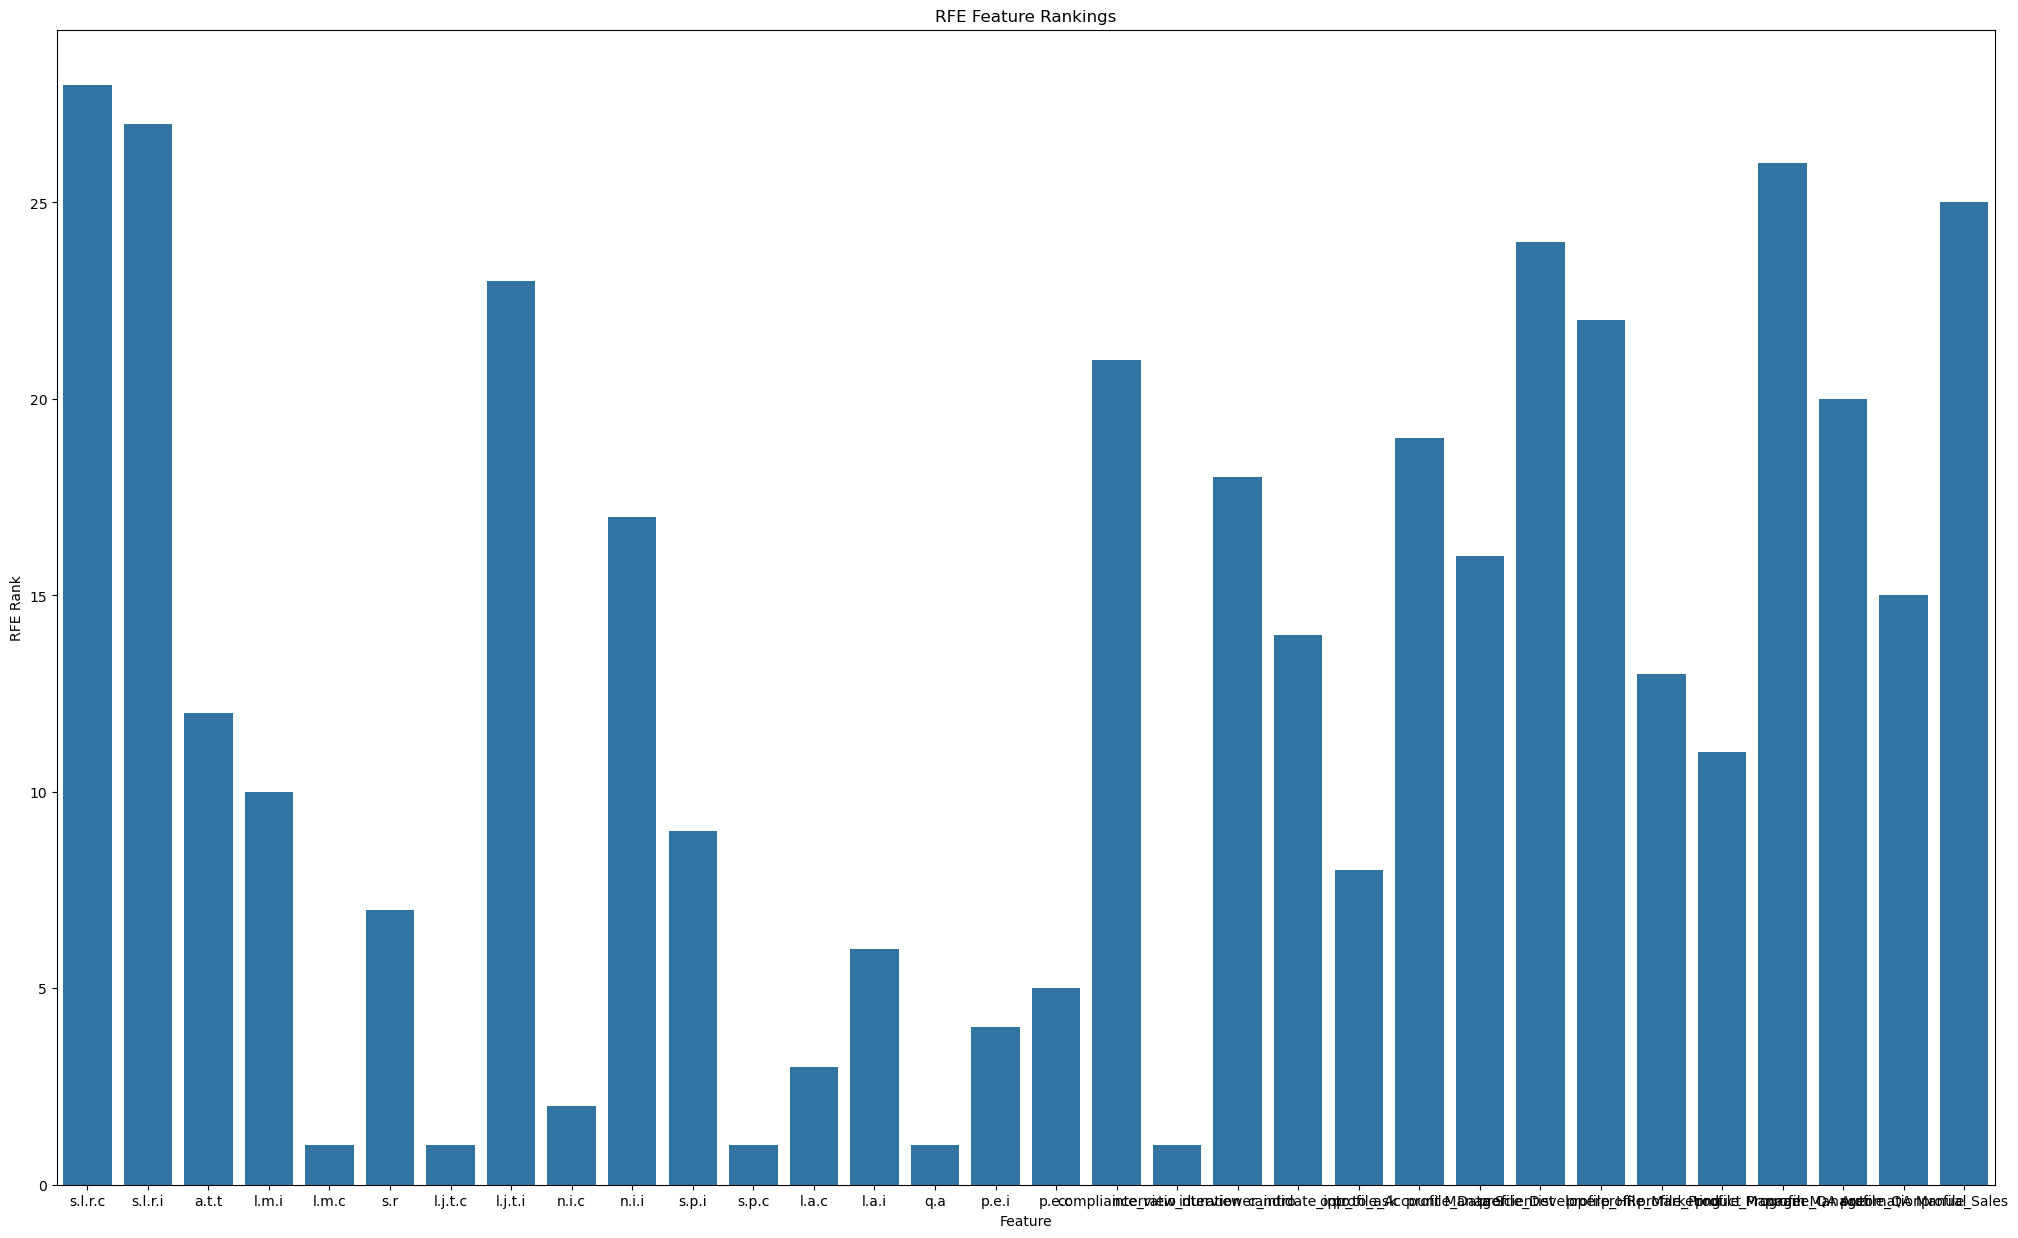

In [72]:
from sklearn.feature_selection import RFE, SelectKBest, chi2

# RFE
rfe = RFE(estimator=lg, n_features_to_select=5)
rfe.fit(trainX, trainy)
feature_ranking = pd.DataFrame({
    "Feature": trainX.columns,
    "RFE Rank": rfe.ranking_,
    "RFE Selected": rfe.support_
})
top_features_rfe = trainX.columns[rfe.support_]

# Print results
print("Top Features Selected by RFE:", top_features_rfe)

# Visualization
plt.figure(figsize=(25, 15))
sns.barplot(x="Feature", y="RFE Rank", data=feature_ranking)
plt.title("RFE Feature Rankings")
plt.show()

In [73]:
# Descision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [74]:
dt= DecisionTreeClassifier().fit(trainX, trainy)

In [75]:
#PRredict.
test_predict= dt.predict(testX)

In [76]:
print(confusion_matrix(testy, test_predict))

[[607  57   0]
 [ 75 469  50]
 [  6  77 400]]


In [77]:
print(classification_report(testy, test_predict))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       664
           1       0.78      0.79      0.78       594
           2       0.89      0.83      0.86       483

    accuracy                           0.85      1741
   macro avg       0.85      0.84      0.85      1741
weighted avg       0.85      0.85      0.85      1741



In [78]:
print(accuracy_score(testy, test_predict)*100)

84.77886272257324


In [79]:
dt1= DecisionTreeClassifier(min_samples_leaf=500).fit(trainX, trainy)

[Text(0.4583333333333333, 0.875, 'l.j.t.c <= 130.5\ngini = 0.658\nsamples = 4059\nvalue = [1651, 1296, 1112]\nclass = 0'),
 Text(0.25, 0.625, 'l.j.t.c <= 85.5\ngini = 0.267\nsamples = 1760\nvalue = [1482, 274, 4]\nclass = 0'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'l.j.t.c <= 48.5\ngini = 0.094\nsamples = 1177\nvalue = [1119, 58, 0]\nclass = 0'),
 Text(0.08333333333333333, 0.125, 'gini = 0.021\nsamples = 670\nvalue = [663, 7, 0]\nclass = 0'),
 Text(0.25, 0.125, 'gini = 0.181\nsamples = 507\nvalue = [456, 51, 0]\nclass = 0'),
 Text(0.3333333333333333, 0.375, 'gini = 0.475\nsamples = 583\nvalue = [363, 216, 4]\nclass = 0'),
 Text(0.6666666666666666, 0.625, 'l.j.t.c <= 214.5\ngini = 0.565\nsamples = 2299\nvalue = [169, 1022, 1108]\nclass = 2'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 's.p.c <= 44.5\ngini = 0.477\nsamples = 1113\nvalue = [167, 767, 179]\nclass = 1'),
 Text(0.4166666666666667, 0.125, 'gini = 0.475\nsamples = 504\nvalue = [24

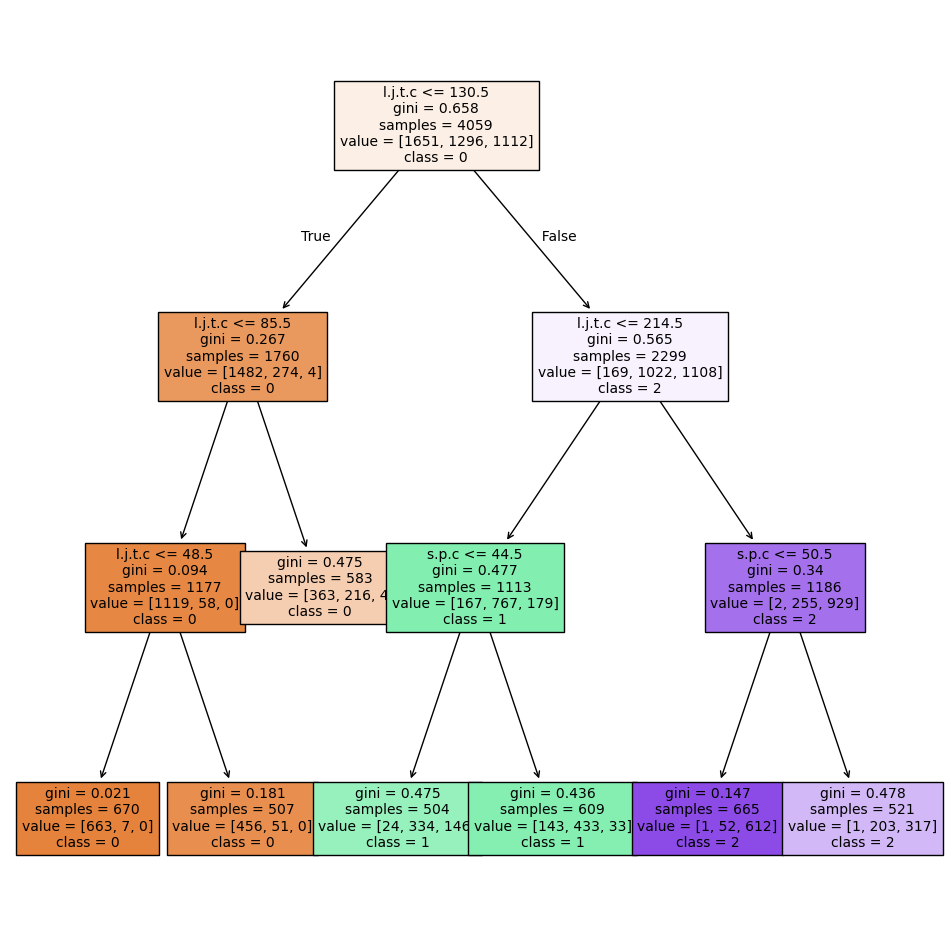

In [80]:
plt.figure(figsize=(12,12))
plot_tree(dt1, feature_names=trainX.columns, class_names=["0","1","2"], fontsize=10, filled=True)

In [81]:
# KNN (KNeighborsClassifier)
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knm= KNeighborsClassifier(n_neighbors=5)
knm.fit(trainX,trainy)

KNeighborsClassifier()

In [83]:
# Prediction
y_Prediction= knm.predict(testX)

In [84]:
# Evaluation
print(confusion_matrix(y_Prediction, testy))
print(classification_report(y_Prediction, testy))

[[607  91   0]
 [ 57 459  73]
 [  0  44 410]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       698
           1       0.77      0.78      0.78       589
           2       0.85      0.90      0.88       454

    accuracy                           0.85      1741
   macro avg       0.85      0.85      0.85      1741
weighted avg       0.85      0.85      0.85      1741



In [85]:
print(accuracy_score(testy, y_Prediction)*100)

84.77886272257324


## Standardization Of DataSet.

In [86]:
# Scaling the daaset
from sklearn.preprocessing import StandardScaler

In [87]:
sd= StandardScaler().fit(trainX)

trainSTD= sd.transform(trainX)
testSTD=  sd.transform(testX)

In [88]:
# Converting into Data Frame
trainstd= pd.DataFrame(trainSTD, columns=trainX.columns)
teststd= pd.DataFrame(testSTD, columns=testX.columns)

In [89]:
trainstd.head()

,s.l.r.c,s.l.r.i,a.t.t,l.m.i,l.m.c,s.r,l.j.t.c,l.j.t.i,n.i.c,n.i.i,s.p.i,s.p.c,l.a.c,l.a.i,q.a,p.e.i,p.e.c,compliance_ratio,interview_duration,interviewer_intro,candidate_into,opp_to_ask,profile_Account Manager,profile_Data Scientist,profile_Developer,profile_HR,profile_Marketing,profile_Product Manager,profile_Program Manager,profile_QA Automation,profile_QA Manual,profile_Sales
0,0.0,0.0,-0.335096,0.218604,0.410384,-0.541338,-0.230509,0.996845,-1.389576,-0.639041,0.420732,-1.286985,1.619915,-1.480740,-0.296802,-1.200814,0.003651,1.212986,-1.089463,-0.989949,1.014643,0.986540,-0.347349,-0.333835,-0.347349,3.071555,-0.330635,-0.328798,-0.333835,-0.331093,-0.327416,-0.326955
1,0.0,0.0,-0.301340,0.862922,-1.708727,-1.433318,1.152706,-0.373268,1.714485,-1.211685,-0.902877,-0.966846,0.230634,1.674929,0.289436,1.250332,0.003651,-1.611948,1.697341,-0.989949,1.014643,0.986540,-0.347349,-0.333835,-0.347349,-0.325568,-0.330635,3.041381,-0.333835,-0.331093,-0.327416,-0.326955
2,0.0,0.0,1.420249,-0.855261,-0.140585,0.762326,-0.962127,0.584650,-0.495186,0.089778,0.469754,-0.326567,1.619915,0.973670,-0.883039,1.250332,-1.231183,-0.182043,-1.541378,-0.989949,-0.985569,0.986540,-0.347349,-0.333835,2.878946,-0.325568,-0.330635,-0.328798,-0.333835,-0.331093,-0.327416,-0.326955
3,0.0,0.0,1.116439,-1.413670,-1.115376,1.242623,1.141275,1.083929,1.293596,1.026832,0.371709,-0.926828,1.619915,-0.078220,-0.296802,-1.200814,0.003651,0.271342,1.697341,1.010153,1.014643,-1.013643,-0.347349,-0.333835,-0.347349,-0.325568,-0.330635,-0.328798,2.995492,-0.331093,-0.327416,-0.326955
4,0.0,0.0,0.171253,0.691104,-0.140585,-1.433318,0.672582,-0.245546,-0.389963,0.766539,1.499227,-0.206515,0.693728,0.447725,-1.469277,0.024759,0.003651,0.375969,-0.712868,-0.989949,1.014643,0.986540,-0.347349,-0.333835,-0.347349,-0.325568,-0.330635,-0.328798,-0.333835,-0.331093,3.054217,-0.326955


In [90]:
teststd.tail()

,s.l.r.c,s.l.r.i,a.t.t,l.m.i,l.m.c,s.r,l.j.t.c,l.j.t.i,n.i.c,n.i.i,s.p.i,s.p.c,l.a.c,l.a.i,q.a,p.e.i,p.e.c,compliance_ratio,interview_duration,interviewer_intro,candidate_into,opp_to_ask,profile_Account Manager,profile_Data Scientist,profile_Developer,profile_HR,profile_Marketing,profile_Product Manager,profile_Program Manager,profile_QA Automation,profile_QA Manual,profile_Sales
1736,0.0,0.0,-0.638906,1.120650,0.495148,-1.570546,-0.161920,-1.679521,1.135762,0.141837,1.450205,0.593833,-0.232460,1.324300,-0.296802,-1.200814,0.003651,-0.565676,0.642875,1.010153,-0.985569,-1.013643,2.878946,-0.333835,-0.347349,-0.325568,-0.330635,-0.328798,-0.333835,-0.331093,-0.327416,-0.326955
1737,0.0,0.0,-1.516579,-1.241852,-0.182967,0.213415,-0.664907,1.530957,1.188373,0.245954,0.567799,-0.926828,-0.695553,0.447725,-0.883039,1.250332,1.238484,0.375969,-1.692016,1.010153,-0.985569,-1.013643,-0.347349,-0.333835,-0.347349,3.071555,-0.330635,-0.328798,-0.333835,-0.331093,-0.327416,-0.326955
1738,0.0,0.0,-0.233827,-0.941170,0.579913,1.722920,0.169594,-0.344240,-1.600021,-1.159626,-1.540170,0.313711,-1.390194,0.447725,-0.296802,1.250332,1.238484,1.561743,0.416918,-0.989949,-0.985569,-1.013643,-0.347349,-0.333835,2.878946,-0.325568,-0.330635,-0.328798,-0.333835,-0.331093,-0.327416,-0.326955
1739,0.0,0.0,-0.200070,1.034741,-0.437260,1.448464,1.312748,-1.424076,-1.600021,1.547417,-0.804832,-1.166933,-1.621740,-0.253535,0.875674,1.250332,-1.231183,1.282738,-0.260954,1.010153,-0.985569,-1.013643,-0.347349,-0.333835,-0.347349,-0.325568,-0.330635,-0.328798,-0.333835,3.020297,-0.327416,-0.326955
1740,0.0,0.0,-0.470123,1.292468,-1.708727,0.625098,1.312748,-0.640324,1.240984,0.870656,1.009002,1.314146,0.230634,0.798355,-1.469277,1.250332,0.003651,-0.391297,-0.486911,1.010153,1.014643,0.986540,-0.347349,2.995492,-0.347349,-0.325568,-0.330635,-0.328798,-0.333835,-0.331093,-0.327416,-0.326955


In [91]:
# RandomForrest Classifer with Standardize data.
rfstd= RandomForestClassifier().fit(trainstd, trainy)

In [92]:
# Prediction
y_predict= rfstd.predict(teststd)

In [93]:
# Evaluation
print(confusion_matrix(testy, y_predict))
print(classification_report(testy,y_predict))

[[618  46   0]
 [ 88 477  29]
 [  0  51 432]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       664
           1       0.83      0.80      0.82       594
           2       0.94      0.89      0.92       483

    accuracy                           0.88      1741
   macro avg       0.88      0.88      0.88      1741
weighted avg       0.88      0.88      0.88      1741



In [94]:
print(accuracy_score(testy, y_predict)*100)

87.70821367030443


In [95]:
# Logistic Regression with Standardize data.
lgstd= LogisticRegression().fit(trainstd, trainy)

In [96]:
# Prediction 
y_pd= lgstd.predict(teststd)

In [97]:
# Evaluation
print(confusion_matrix(testy, y_pd))
print(classification_report(testy,y_pd))

[[661   3   0]
 [  7 576  11]
 [  0   7 476]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       664
           1       0.98      0.97      0.98       594
           2       0.98      0.99      0.98       483

    accuracy                           0.98      1741
   macro avg       0.98      0.98      0.98      1741
weighted avg       0.98      0.98      0.98      1741



In [98]:
print(accuracy_score(testy, y_pd)*100)

98.3917288914417


In [99]:
# Decision Classifier with Standardize data.
dt= DecisionTreeClassifier().fit(trainstd, trainy)

In [100]:
# Prediction
y_prd= dt.predict(teststd)

In [101]:
# Evaluation
print(confusion_matrix(testy, y_prd))
print(classification_report(testy,y_prd))

[[603  61   0]
 [ 73 468  53]
 [  3  81 399]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       664
           1       0.77      0.79      0.78       594
           2       0.88      0.83      0.85       483

    accuracy                           0.84      1741
   macro avg       0.85      0.84      0.84      1741
weighted avg       0.85      0.84      0.84      1741



In [102]:
print(accuracy_score(testy, y_prd)*100)

84.43423319931074


In [103]:
dt2= DecisionTreeClassifier(min_samples_leaf=500).fit(trainstd, trainy)

[Text(0.4583333333333333, 0.875, 'l.j.t.c <= -0.225\ngini = 0.658\nsamples = 4059\nvalue = [1651, 1296, 1112]\nclass = 0'),
 Text(0.25, 0.625, 'l.j.t.c <= -0.739\ngini = 0.267\nsamples = 1760\nvalue = [1482, 274, 4]\nclass = 0'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'l.j.t.c <= -1.162\ngini = 0.094\nsamples = 1177\nvalue = [1119, 58, 0]\nclass = 0'),
 Text(0.08333333333333333, 0.125, 'gini = 0.021\nsamples = 670\nvalue = [663, 7, 0]\nclass = 0'),
 Text(0.25, 0.125, 'gini = 0.181\nsamples = 507\nvalue = [456, 51, 0]\nclass = 0'),
 Text(0.3333333333333333, 0.375, 'gini = 0.475\nsamples = 583\nvalue = [363, 216, 4]\nclass = 0'),
 Text(0.6666666666666666, 0.625, 'l.j.t.c <= 0.735\ngini = 0.565\nsamples = 2299\nvalue = [169, 1022, 1108]\nclass = 2'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 's.p.c <= -0.106\ngini = 0.477\nsamples = 1113\nvalue = [167, 767, 179]\nclass = 1'),
 Text(0.4166666666666667, 0.125, 'gini = 0.475\nsamples = 504\nvalu

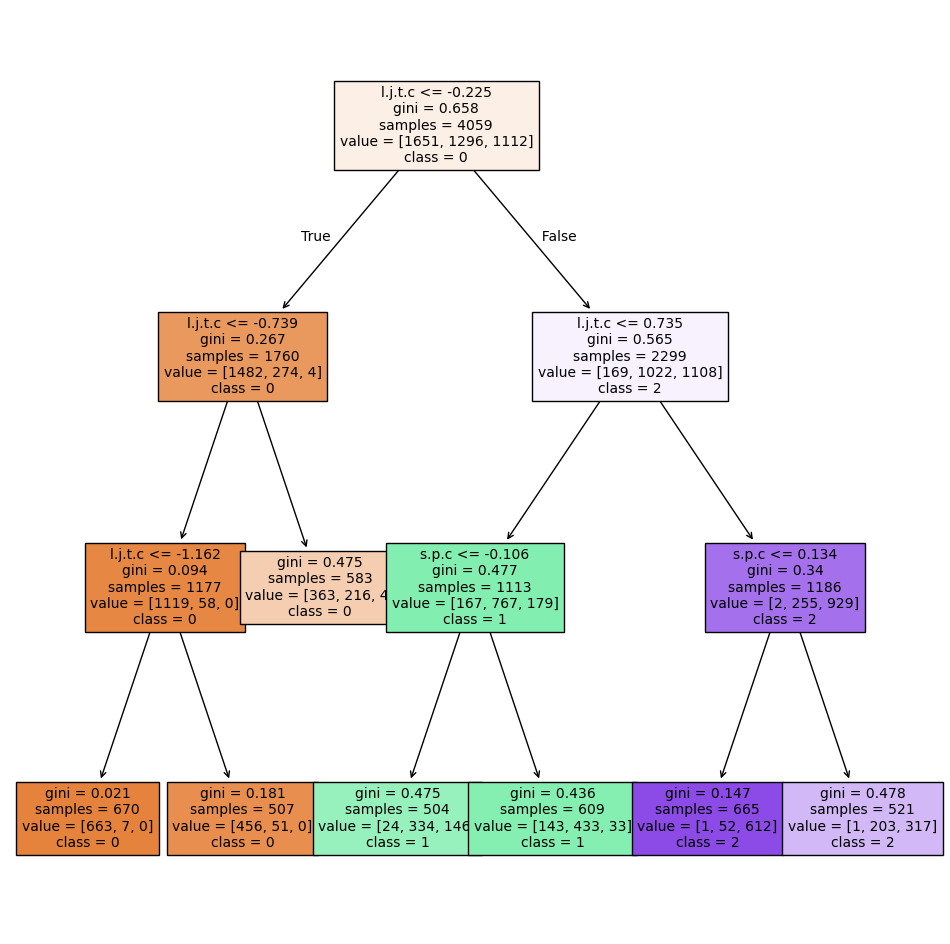

In [104]:
plt.figure(figsize=(12,12))
plot_tree(dt2, feature_names=trainX.columns, class_names=["0","1","2"], fontsize=10, filled=True)

In [105]:
# KNN with Standardize data.
knm1= knm.fit(trainstd, trainy)
y_prediction= knm1.predict(testX)

In [106]:
print(confusion_matrix(testy, y_prediction))
print(classification_report(testy,y_prediction))
print(accuracy_score(y_prediction, testy)*100)

[[235 330  99]
 [  3 305 286]
 [  0 144 339]]
              precision    recall  f1-score   support

           0       0.99      0.35      0.52       664
           1       0.39      0.51      0.44       594
           2       0.47      0.70      0.56       483

    accuracy                           0.50      1741
   macro avg       0.62      0.52      0.51      1741
weighted avg       0.64      0.50      0.51      1741

50.4882251579552


## Hyper Parameter Tuning

In [107]:
# Support Vector Machine 
from sklearn.svm import SVC

In [108]:
svc= SVC()
svc.fit(trainstd, trainy)

SVC()

In [109]:
# Prediction
ytestpredict= svc.predict(teststd)

In [110]:
print(confusion_matrix(ytestpredict, testy))

[[649  35   0]
 [ 15 530  36]
 [  0  29 447]]


In [111]:
print(classification_report(ytestpredict, testy))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       684
           1       0.89      0.91      0.90       581
           2       0.93      0.94      0.93       476

    accuracy                           0.93      1741
   macro avg       0.93      0.93      0.93      1741
weighted avg       0.93      0.93      0.93      1741



In [112]:
# Gridsearch Practice
from sklearn.model_selection import GridSearchCV

In [113]:
# crearting a dictionary callar param_grid ans fill some parameter C and gamma
param_grid= {"C": [0.1,1,10,100,1000], "gamma":[1,0.1,0.01,0.001,0.0001]}

In [114]:
# Gridseach object fit it to the taining data set.
GS= GridSearchCV(SVC(), param_grid=param_grid, verbose=3)
GS.fit(trainX, trainy)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.406 total time=   2.3s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.406 total time=   2.4s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.406 total time=   2.3s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.408 total time=   2.3s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.407 total time=   2.3s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.406 total time=   2.4s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.406 total time=   2.3s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.406 total time=   2.3s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.408 total time=   2.3s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.407 total time=   2.5s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.406 total time=   2.5s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [115]:
# Prediction on GridSeachCV
YtestPredict= GS.predict(testX)

In [116]:
print(confusion_matrix(YtestPredict, testy))

[[649  26   1]
 [ 15 542  17]
 [  0  26 465]]


In [117]:
print(classification_report(YtestPredict, testy))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       676
           1       0.91      0.94      0.93       574
           2       0.96      0.95      0.95       491

    accuracy                           0.95      1741
   macro avg       0.95      0.95      0.95      1741
weighted avg       0.95      0.95      0.95      1741



In [118]:
# Gridseach object fit it to the taining data set using logistic Regression.
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga'],
    'max_iter': [1000]}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(trainX, trainy)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga']})

In [119]:
# Prediction on GridSeachCV
lr_preds = grid.best_estimator_.predict(testX)

In [120]:
print(confusion_matrix(lr_preds, testy))
print(classification_report(lr_preds, testy))

[[661   4   0]
 [  3 554  32]
 [  0  36 451]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       665
           1       0.93      0.94      0.94       589
           2       0.93      0.93      0.93       487

    accuracy                           0.96      1741
   macro avg       0.95      0.95      0.95      1741
weighted avg       0.96      0.96      0.96      1741



In [121]:
# Gridseach object fit it to the taining data set using Ramdom Forrest Classifier.
nEstimators=[20,50,100,150]
minSampleLeaf=[20,50,100,150]
maxFeatures=[2,4,6,8]

In [122]:
paramgrid={'n_estimators':nEstimators, 'min_samples_leaf':minSampleLeaf, 'max_features': maxFeatures}

In [123]:
GridSearch= GridSearchCV(estimator=RandomForestClassifier(), param_grid=paramgrid, cv=4, scoring='accuracy').fit(trainX, trainy)

In [124]:
GridSearch.cv_results_

{'mean_fit_time': array([0.10981852, 0.26464999, 0.53829658, 0.800623  , 0.09508365,
        0.23544627, 0.46515673, 0.70054561, 0.07955992, 0.2105791 ,
        0.41217107, 0.62058151, 0.08677125, 0.20488274, 0.38600093,
        0.58323729, 0.14942664, 0.36826533, 0.7193501 , 1.0725345 ,
        0.12715679, 0.30954415, 0.63460898, 0.9811368 , 0.11175197,
        0.29008728, 0.56371272, 0.81246012, 0.11388111, 0.26081318,
        0.52759844, 0.76931977, 0.18624997, 0.45041895, 0.88769239,
        1.23624593, 0.13428295, 0.31783301, 0.69942856, 1.07351631,
        0.14017653, 0.31830835, 0.60562438, 0.90439975, 0.11097115,
        0.28993165, 0.5675683 , 0.82856315, 0.21891844, 0.5289039 ,
        1.02410835, 1.53576219, 0.1702832 , 0.42476028, 0.82654601,
        1.22646564, 0.14395988, 0.34665668, 0.70095426, 1.05514807,
        0.12580615, 0.31352645, 0.61551481, 0.93300194]),
 'std_fit_time': array([0.00208385, 0.00952476, 0.00990619, 0.00792187, 0.00012944,
        0.00540648, 0.004

In [125]:
GridSearchDf= pd.DataFrame(GridSearch.cv_results_)

In [126]:
GridSearchDf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.109819,0.002084,0.015006,0.001537,2,20,20,"{'max_features': 2, 'min_samples_leaf': 20, 'n...",0.741872,0.674877,0.695567,0.753452,0.716442,0.032326,55
1,0.264650,0.009525,0.023611,0.006995,2,20,50,"{'max_features': 2, 'min_samples_leaf': 20, 'n...",0.829557,0.778325,0.764532,0.794872,0.791821,0.024291,49
2,0.538297,0.009906,0.033451,0.004114,2,20,100,"{'max_features': 2, 'min_samples_leaf': 20, 'n...",0.827586,0.800000,0.813793,0.804734,0.811528,0.010513,40
3,0.800623,0.007922,0.047821,0.004701,2,20,150,"{'max_features': 2, 'min_samples_leaf': 20, 'n...",0.819704,0.803941,0.810837,0.829389,0.815968,0.009553,38
4,0.095084,0.000129,0.011879,0.006858,2,50,20,"{'max_features': 2, 'min_samples_leaf': 50, 'n...",0.632512,0.636453,0.756650,0.719921,0.686384,0.053519,58


In [127]:
GridSearchDf.to_csv("GridSearchDf.csv")

In [ ]:
# Building Final Model
#{'max_features': 8, 'min_samples_leaf': 20, 'n_estimators': 50}

In [128]:
Rf_Final= RandomForestClassifier(max_features=8, min_samples_leaf=20, n_estimators=50).fit(trainX,trainy)

In [129]:
test_predict=Rf_Final.predict(testX)

In [130]:
print(confusion_matrix(testy, test_predict))
print(classification_report(testy, test_predict))

[[620  44   0]
 [ 86 477  31]
 [  0  60 423]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       664
           1       0.82      0.80      0.81       594
           2       0.93      0.88      0.90       483

    accuracy                           0.87      1741
   macro avg       0.88      0.87      0.87      1741
weighted avg       0.87      0.87      0.87      1741



In [132]:
data_with_preds = testDf.copy()
data_with_preds['Prediction'] = test_predict

In [144]:
data_with_preds['Prediction']=data_with_preds['Prediction'].map({0:'Consider',1:'May Conider',2:'Not Consider'})

In [146]:
data_with_preds.head()

,s.l.r.c,s.l.r.i,a.t.t,l.m.i,l.m.c,s.r,l.j.t.c,l.j.t.i,n.i.c,n.i.i,s.p.i,s.p.c,l.a.c,l.a.i,q.a,p.e.i,p.e.c,compliance_ratio,interview_duration,interviewer_intro,candidate_into,opp_to_ask,status,profile_Account Manager,profile_Data Scientist,profile_Developer,profile_HR,profile_Marketing,profile_Product Manager,profile_Program Manager,profile_QA Automation,profile_QA Manual,profile_Sales,Prediction
3456,0,0,74,65,94,55,187,267,48,16,69,24,9,13,4,1,1,56,45,0,1,1,1,0,0,0,0,0,0,1,0,0,0,May Conider
1142,0,0,102,85,90,48,172,596,37,61,48,71,4,19,6,0,1,49,15,0,1,0,1,0,0,0,0,1,0,0,0,0,0,May Conider
2676,0,0,38,76,47,40,125,366,31,51,37,69,2,20,5,0,0,85,43,0,1,0,0,0,0,0,0,0,0,0,0,0,1,Consider
2200,0,0,42,40,47,66,163,280,24,62,42,75,6,11,4,0,2,9,49,1,0,1,1,0,0,1,0,0,0,0,0,0,0,May Conider
5403,0,0,44,105,90,41,140,136,23,22,70,74,9,1,7,2,0,10,52,0,0,1,0,0,1,0,0,0,0,0,0,0,0,Consider


In [147]:
data_with_preds.to_csv("data_with_pred.csv")